# Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
#We want to import specific class ImageDataGenerator
tf.__version__ #-> Check the tensorflow version

'2.15.0'

# Data PreProcessing

In [2]:
#PreProcessing Images
#apply transformation on the training set
#To avoid overfitting, else when we training CNN on the training set,
#we will get huge difference between Training and Test test

#Apply Geometric transformation

Preprocessing Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, #Feature Scaling each pixel
                                   shear_range = 0.2,#->Transformation
                                   zoom_range = 0.2,#->Transformation
                                   horizontal_flip = True)#Transformation
                                   #Performing image augmentation to avoid overfitting
training_set = train_datagen.flow_from_directory('../Dataset/training_set',
                                                 target_size = (64, 64), #Final size of image
                                                 #When they fed into CNN
                                                 batch_size = 32, 
                                                 #How many images in each batch
                                                 class_mode = 'binary')
                                                 #Binary or Categorical as value

Found 8000 images belonging to 2 classes.


Preprocessing Test Data

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../Dataset/test_set',
                                            target_size = (64, 64),
                                            #Target size must be in the same format as training
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#Conv2D:
#Filters: Number of feature detector you want to apply
#Kernel Size (Number or row and column in squarred array), 3 -> 3 x 3
#Input shape of your inputs
#RGB -> 3Dimension (R,G,B)
#Because we resize to 64, 64, the input is 64, 64, 3

Pooling (Max Pooling)

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(2, strides=2))
#Pool_size: The distance used for pooling

### Adding Second Convusional Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2, strides=2))
#Input size is only used at first layer to automatically connect the first layer to
#input layer

### FLattening

In [9]:
#flattening the result of convolution and pooling into 1D Vector
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#Units: Number of hidden neuron you want to have in this fully connected Neural Network
#Activation function : Relu (Rectifier activation fucntion)
#As long as not the output, use ReLu

### Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#Units = 1, because we need to only classify 2 things dog or cat
#Activation function: Sigmoid

# Training the CNN

#### Compiling The CNN

In [12]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

#### Training the CNN and Evaluate

In [13]:
cnn.fit(x = training_set, validation_data= test_set, epochs=25)
#Input
#Training Dataset as X
#Validation data 
#Test_set no transformation applied, only feature scaling

Epoch 1/25


250/250 [==============================] - 22s 87ms/step - loss: 0.6823 - accuracy: 0.5515 - val_loss: 0.6234 - val_accuracy: 0.6615
Epoch 2/25
250/250 [==============================] - 17s 68ms/step - loss: 0.6212 - accuracy: 0.6511 - val_loss: 0.5777 - val_accuracy: 0.7090
Epoch 3/25
250/250 [==============================] - 17s 66ms/step - loss: 0.5757 - accuracy: 0.6980 - val_loss: 0.5463 - val_accuracy: 0.7280
Epoch 4/25
250/250 [==============================] - 16s 64ms/step - loss: 0.5433 - accuracy: 0.7268 - val_loss: 0.5224 - val_accuracy: 0.7455
Epoch 5/25
250/250 [==============================] - 17s 66ms/step - loss: 0.5155 - accuracy: 0.7412 - val_loss: 0.5039 - val_accuracy: 0.7625
Epoch 6/25
250/250 [==============================] - 16s 63ms/step - loss: 0.4999 - accuracy: 0.7527 - val_loss: 0.5347 - val_accuracy: 0.7270
Epoch 7/25
250/250 [==============================] - 16s 65ms/step - loss: 0.4866 - accuracy: 0.7621 - val_loss: 0.5145 - val_accurac

# Making Single Prediction

In [14]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('../Dataset/single_prediction/cat_or_dog1.jpg', target_size=(64,64))
test_image2 = image.load_img('../Dataset/single_prediction/cat_or_dog2.jpg', target_size=(64,64))
#The size must be the same as we declare before

Cat

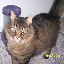

In [15]:
test_image1

Dog

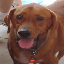

In [16]:
test_image2

In [17]:
#Convert the test image into numpy array
test_image1 = image.img_to_array(test_image1)#Format expected by the predict method

#Because in our preprocessing process, we created batches of images,
#Meaning our model is trained with batches of images
#Therefore we have extra dimension corresponding to the images

#Even if we deploy our model in single image, the single image needs has to be a batch, 
#So the CNN can recognize the batch
test_image1 = np.expand_dims(test_image1, axis=0)

#Image 2
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)

Predcting

In [18]:
#We need to see the Class or binary of the corresponding class
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [19]:
result = cnn.predict(test_image1)
if result[0][0] == 0:
    print("cat")
else: print("dog")

1/1 [==============================] - 0s 76ms/step
dog


Test

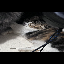

In [20]:
mort = image.load_img('../Dataset/single_prediction/mort.png', target_size=(64,64))
mort

In [21]:
mort = image.img_to_array(mort)
mort = np.expand_dims(mort, axis=0)

In [22]:
result = cnn.predict(mort)
if result[0][0] == 0:
    print("cat")
else: print("dog")

1/1 [==============================] - 0s 16ms/step
dog


Saving the Model

In [23]:
cnn.save('modelcnn.h5')

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(cnn, file)